# SETUP

In [1]:
import time
beginning_time = time.time()

import sys
sys.path.append("../Code/")
from utils import performance

import os
DATA_DIR = os.path.join('..', 'Data')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
def timtime(t):
    print(">",int(time.time()- t), "seconds elapsed")

# LOAD DATA

In [3]:
# sparse might be important?

develop = False
        
train_X = pd.concat([pd.read_pickle(os.path.join(DATA_DIR, 'train_X_1')), 
                     pd.read_pickle(os.path.join(DATA_DIR, 'train_X_2'))])
train_y = pd.read_pickle(os.path.join(DATA_DIR, 'train_y'))
valid_X = pd.read_pickle(os.path.join(DATA_DIR, 'valid_X'))
valid_y = pd.read_pickle(os.path.join(DATA_DIR, 'valid_y'))

if develop:
    train_X = train_X[0:10000]
    train_y = train_y[0:10000]
    valid_X = valid_X[0:1000]
    valid_y = valid_y[0:1000]

In [4]:
test_X = pd.read_pickle(os.path.join(DATA_DIR, 'test_X'))

In [5]:
from scipy.sparse import csr_matrix
train_X = csr_matrix(train_X) 
valid_X = csr_matrix(valid_X)
test_X = csr_matrix(test_X)

# CTR Classifier

In [6]:
from xgboost import XGBClassifier, XGBRegressor

In [8]:
#### IMPORT CTR PREDICTOR
import pickle
pkl_filename = "../Models/tim_xgb_click.pkl"  
with open(pkl_filename, 'rb') as file:  
    CTR_model = pickle.load(file)

# Evaluate/tune

In [12]:
#

### Linear bidding

In [21]:
valid_ctr_pred = CTR_model.predict(valid_X)

In [38]:
min_base_bid = 0
max_base_bid = 1e6
n_base_bids = 100000

base_bid = np.linspace(min_base_bid, max_base_bid, n_base_bids)
clicks = np.zeros_like(base_bid)

for i, bb in zip(range(n_base_bids), base_bid):
    bids = bb*valid_ctr_pred
    _, c, __, ___, ____ = performance(bids, valid_y, verbose=False)
    clicks[i] = c

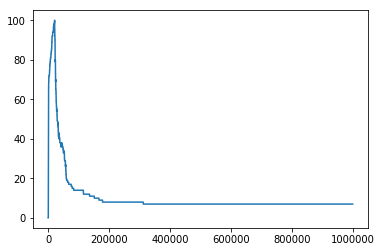

Best number of clicks: 100.0
Best base bid: 583.426


In [39]:
#### plot ####
plt.plot(base_bid, clicks)
plt.show()

# best result
print("Best number of clicks:", np.max(clicks))
print("Best base bid:", bids[np.argmax(clicks)])



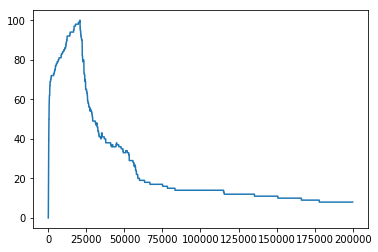

Best number of clicks: 100.0
Best base bid: 254.361


In [40]:
### now try a smaller range of values

min_base_bid = 0
max_base_bid = 2e5
n_base_bids = 10000

base_bid = np.linspace(min_base_bid, max_base_bid, n_base_bids)
clicks = np.zeros_like(base_bid)

for i, bb in zip(range(n_base_bids), base_bid):
    bids = bb*valid_ctr_pred
    _, c, __, ___, ____ = performance(bids, valid_y, verbose=False)
    clicks[i] = c
    
plt.plot(base_bid, clicks)
plt.show()

# best result
print("Best number of clicks:", np.max(clicks))
print("Best base bid:", bids[np.argmax(clicks)])

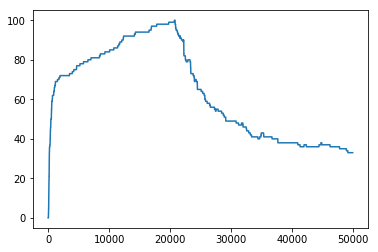

Best number of clicks: 100.0
Best base bid: 60.3499


In [41]:
### now try a smaller range of values

min_base_bid = 0
max_base_bid = 5e4
n_base_bids = 10000

base_bid = np.linspace(min_base_bid, max_base_bid, n_base_bids)
clicks = np.zeros_like(base_bid)

for i, bb in zip(range(n_base_bids), base_bid):
    bids = bb*valid_ctr_pred
    _, c, __, ___, ____ = performance(bids, valid_y, verbose=False)
    clicks[i] = c
    
plt.plot(base_bid, clicks)
plt.show()

# best result
print("Best number of clicks:", np.max(clicks))
print("Best base bid:", bids[np.argmax(clicks)])

# PRINTED "BEST BASE BID" above is wrong

In [50]:
base_bid[np.argmax(clicks)]

20702.070207020704

In [51]:
performance(int(base_bid[np.argmax(clicks)])*valid_ctr_pred, valid_y)

       CTR: (0.0028)%
num_clicks: 100
     spend: 624949 (99.99)%
      aCPM: 0
      aCPC: 6249


(0.0028376844494892167, 100, 624949, 0, 6249)

### Run on test set

In [52]:
submission = pd.read_csv('../Data/Group_01.csv')

In [53]:
submission.head()

,bidid,bidprice
0,366c563de7d90feb9d4dab53e795a93fb3157387,0.0
1,29167d4caa719788b5a342dbaa25151d53121f80,0.0
2,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,0.0
3,844c2da00d45315f20b748ec131c26ee99a7cbc7,0.0
4,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,0.0


In [54]:
test_predictions = int(base_bid[np.argmax(clicks)])*CTR_model.predict(test_X)

In [55]:
submission.bidprice = test_predictions

In [56]:
submission.head()

,bidid,bidprice
0,366c563de7d90feb9d4dab53e795a93fb3157387,17.927221
1,29167d4caa719788b5a342dbaa25151d53121f80,52.111004
2,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,12.078087
3,844c2da00d45315f20b748ec131c26ee99a7cbc7,17.443142
4,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,14.969856


In [58]:
submission.to_csv('../Group_01.csv')